In [1]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Show with attributes 
graph = gpd.read_file('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/QGIS/waterways_amsterdam_bewerkt/edge_data_lengte.shp')
print(graph.iloc[3]['cost'])
print(graph.head()) 

516.143132510851
   edge_id  start_node  end_node  next_left_  abs_next_l  next_right  \
0       45          63        64          50          50          45   
1       54          78        56         -54          54         -39   
2       39          55        78         -55          55          39   
3        6          11        12        -101         101          43   
4      110         121        60         -41          41         110   

   abs_next_r  left_face  right_face        cost  \
0          45          0           0  122.826431   
1          39          0           0  250.869815   
2          39          0           0   43.350826   
3          43          4           5  516.143133   
4         110          0           0  584.250999   

                                            geometry  
0  LINESTRING (4.8703865 52.364651, 4.8716933 52....  
1  LINESTRING (4.9264105 52.3695602, 4.9289823 52...  
2  LINESTRING (4.9259642 52.3692824, 4.9264105 52...  
3  LINESTRING (4.

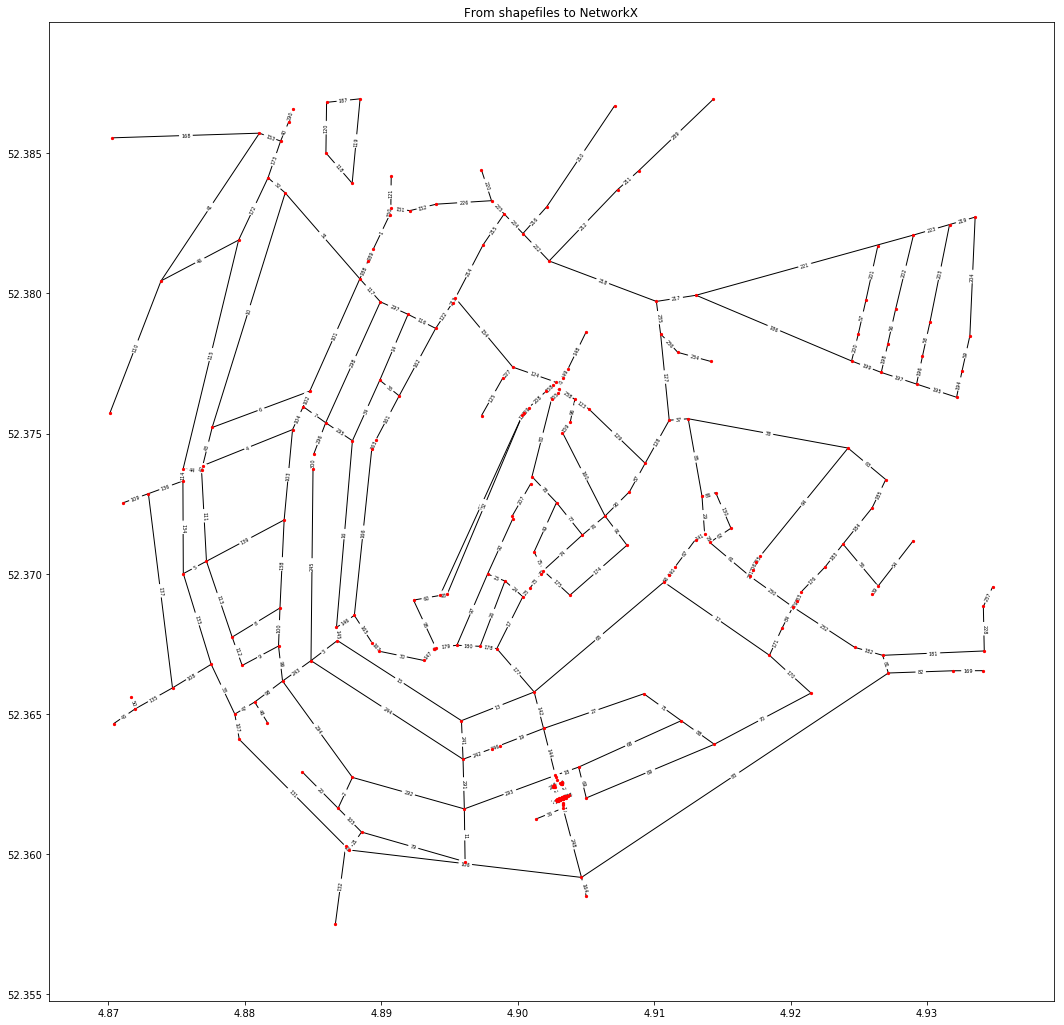

In [3]:
#function that adds attributes to the edges; these attributes are either already in the shapefile,
# or manually add them, which needs a different type of function, defined before this function
G=nx.read_shp('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/QGIS/waterways_amsterdam_bewerkt/edge_data_lengte.shp', simplify=True) # use simplify is false otherwise chart get shifted
canals_amsterdam = list(G.edges(data=True))
weighted_G = nx.Graph()
for i in canals_amsterdam:
    weighted_G.add_edge(i[0],i[1],id=i[2]['edge_id'], cost=i[2]['cost'],start_node=i[2]['start_node'], end_node=i[2]['end_node'])

pos = {v:v for v in weighted_G.nodes()}
canal_id = nx.get_edge_attributes(weighted_G, 'id')
canal_cost =  nx.get_edge_attributes(weighted_G, 'cost')

##canal_touristiness; zelf een functie voor schrijven in python

plt.figure(figsize=(18,18))
nx.draw_networkx_nodes(weighted_G,pos, node_size=5,node_color='r')
nx.draw_networkx_edges(weighted_G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=canal_id, font_size=5)

plt.title('From shapefiles to NetworkX')
#plt.savefig('/Users/JeroenvanderDoes/Downloads/Amsterdam_Canals3.pdf', format='pdf', rasterized=False)
plt.show()

In [4]:
#Draws a network without labels
"""
G = nx.read_shp('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/QGIS/waterways_amsterdam_bewerkt/edge_data_lengte.shp',simplify=True)  # use simplify is false otherwise chart get shifted
H = G.to_undirected()  # make multidigraph of this scheme
pos = {xy: xy for xy in H.nodes()}
plt.figure(figsize=(18,18))
nx.draw(H, pos, node_size=0.5, )
plt.savefig('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/output_Python/network1', format='pdf', rasterized=False)
plt.show()
"""

"\nG = nx.read_shp('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/QGIS/waterways_amsterdam_bewerkt/edge_data_lengte.shp',simplify=True)  # use simplify is false otherwise chart get shifted\nH = G.to_undirected()  # make multidigraph of this scheme\npos = {xy: xy for xy in H.nodes()}\nplt.figure(figsize=(18,18))\nnx.draw(H, pos, node_size=0.5, )\nplt.savefig('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/output_Python/network1', format='pdf', rasterized=False)\nplt.show()\n"

##### Next update of this network contains:
- normal costs
- normal width
- all edges connected
- proper nodes at one-way bridges
- node_id
- edge_id

In [16]:
# see if edge_id, cost are added to the edges
y =list(weighted_G.edges(data=True))
print(y[0])



((4.8703865, 52.364651), (4.8719547, 52.3651758), {'id': 45, 'cost': 122.826431079961, 'start_node': 63, 'end_node': 64})


See if dijkstra works on this network

In [6]:
print(nx.dijkstra_path(weighted_G, (4.8738594, 52.3804434), (4.8859285, 52.3753854), weight='cost'))

[(4.8738594, 52.3804434), (4.8795473, 52.3819009), (4.8817016, 52.3841221), (4.882961, 52.3835835), (4.8884303, 52.3805184), (4.8899351, 52.3796979), (4.8859285, 52.3753854)]


#### Needed: Adding labels to nodes in network, so dijkstra can be done without specifying long lat

In [13]:
canals_nodes = list(weighted_G.nodes(data = True))
print(canals_nodes[0])



((4.8703865, 52.364651), {'name': 0})


In [18]:
print(nx.dijkstra_path(weighted_G, (4.8738594, 52.3804434), (4.8859285, 52.3753854), weight='cost'))

[(4.8738594, 52.3804434), (4.8795473, 52.3819009), (4.8817016, 52.3841221), (4.882961, 52.3835835), (4.8884303, 52.3805184), (4.8899351, 52.3796979), (4.8859285, 52.3753854)]


In [12]:
crossings = list(weighted_G.nodes(data=True))
names_dict = {val[0]: {"name":i} for i, val in enumerate(crossings)}
nx.set_node_attributes(weighted_G, values=names_dict)
print (crossings[0])

((4.8703865, 52.364651), {'name': 0})


In [10]:
c = list(weighted_G.nodes(data=True))
j = 0 
for i in weighted_G.nodes:
    weighted_G.node[i]['name']= j
    j = j + 1 
print (c[0])

((4.8703865, 52.364651), {'name': 0})


In [11]:
c = list(weighted_G.nodes(data=True))
j = 0 
for i in weighted_G.nodes:
    weighted_G.node[i] = j
print (c[1])

TypeError: 'NodeView' object does not support item assignment

### Trouble adding labels to the nodes as iput for Dijkstra


In [ ]:
print(nx.dijkstra_path(weighted_G, 2, 3 weight='cost'))

#### Maybe making a new graph and than adding edges?

In [ ]:
new_G = nx.Graph()
c = list(weighted_G.nodes(data=True))
j = 0 
for i in weighted_G.nodes:
    new_G.add_node(j, pos = i)
    j = j + 1    

k = list(new_G.nodes(data=True))

In [ ]:
pos = {v:v for v in new_G.nodes()}
nx.draw(new_G,nx.get_node_attributes(new_G, 'pos'),)
plt.show